In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [4]:
columns = ['video_id', 'title', 'channel_title', 'category_id', 'publish_time',
          'tags', 'views', 'likes', 'dislikes', 'comment_count',
          'thumbnail_link', 'trending_date', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']

In [5]:
df = pd.read_csv('USvideos.csv', usecols = columns )

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
f = open("US_category_id.json")
data = f.read()
f.close()
out = json.loads(data)
cats = pd.DataFrame([
    {'category_id':x['id'],
     'category':x['snippet']['title'],
     'assignable':x['snippet']['assignable']
    } for x in out['items']
])

In [8]:
cats.dtypes

assignable       bool
category       object
category_id    object
dtype: object

In [9]:
cats.head()

,assignable,category,category_id
0,True,Film & Animation,1
1,True,Autos & Vehicles,2
2,True,Music,10
3,True,Pets & Animals,15
4,True,Sports,17


In [10]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [11]:
# convert category_id to int
cats['category_id'] = cats['category_id'].astype(int)

In [12]:
cats.dtypes

assignable       bool
category       object
category_id     int64
dtype: object

In [13]:
# Merge 2 dfs together 
df = pd.merge(df, cats, on = 'category_id', how = 'left')

In [14]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,assignable,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,True,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,True,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,Entertainment


In [15]:
df['category_id'].nunique()

16

In [16]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,assignable,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,True,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,True,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,Entertainment


In [17]:
df.groupby('category')['likes'].mean()

category
Autos & Vehicles          11056.395833
Comedy                    62415.977538
Education                 29626.148058
Entertainment             52999.623569
Film & Animation          70106.666091
Gaming                    83760.972903
Howto & Style             38869.302286
Music                    217295.291588
News & Politics            7267.697543
Nonprofits & Activism    259923.614035
People & Blogs            56315.202575
Pets & Animals            20898.072368
Science & Technology      34268.162411
Shows                     18993.666667
Sports                    45138.718577
Travel & Events           11938.015000
Name: likes, dtype: float64

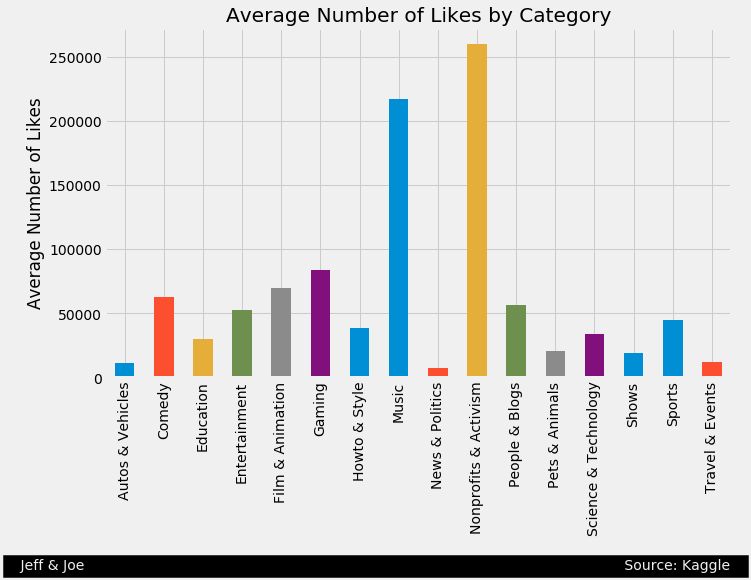

In [18]:
with plt.style.context('fivethirtyeight'):
    likes_plot = df.groupby('category')['likes'].mean().plot(kind = 'bar', figsize = [10, 6])
    likes_plot.set_xlabel('')
    likes_plot.set_ylabel('Average Number of Likes')
    likes_plot.set_title('Average Number of Likes by Category')
    plt.xticks(rotation=90)
    likes_plot.text(x = -3, y = -150000,
    s = '   Jeff & Joe                                                                                                                        Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'black')
    plt.show()

In [19]:
# This visual represents the average number of likes per video category.
# "Music" and "Nonprofits & Activism" are the favorites by far with around 220,000 and 260,000 average number of likes
# repectively.

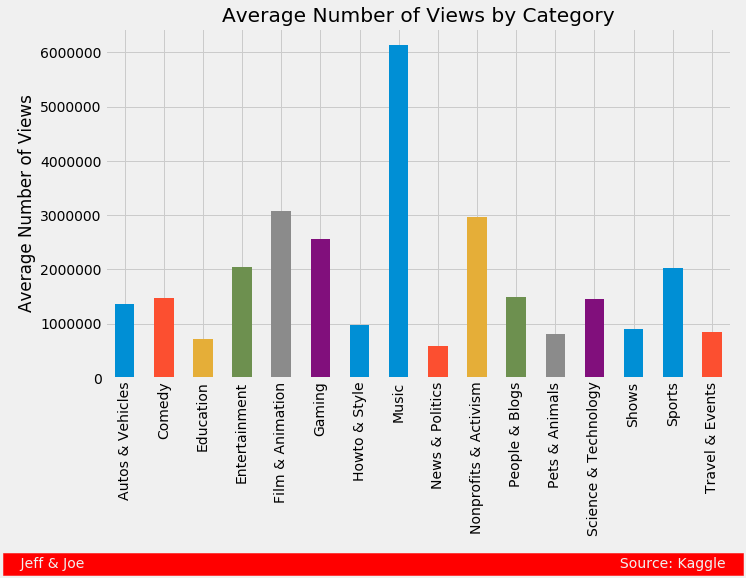

In [20]:
with plt.style.context('fivethirtyeight'):
    dislikes_plot = df.groupby('category')['views'].mean().plot(kind = 'bar', figsize = [10, 6])
    dislikes_plot.set_xlabel('')
    dislikes_plot.set_ylabel('Average Number of Views')
    dislikes_plot.set_title('Average Number of Views by Category')
    plt.xticks(rotation=90)
    dislikes_plot.text(x = -3, y = -3500000,
    s = '   Jeff & Joe                                                                                                                       Source: Kaggle   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'red')
    plt.show()

In [21]:
# This visual represents the average number of views per video category.
# The "Music" category has the most average number of views by far, with around 610,000.

In [22]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,assignable,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,True,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,True,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,Entertainment


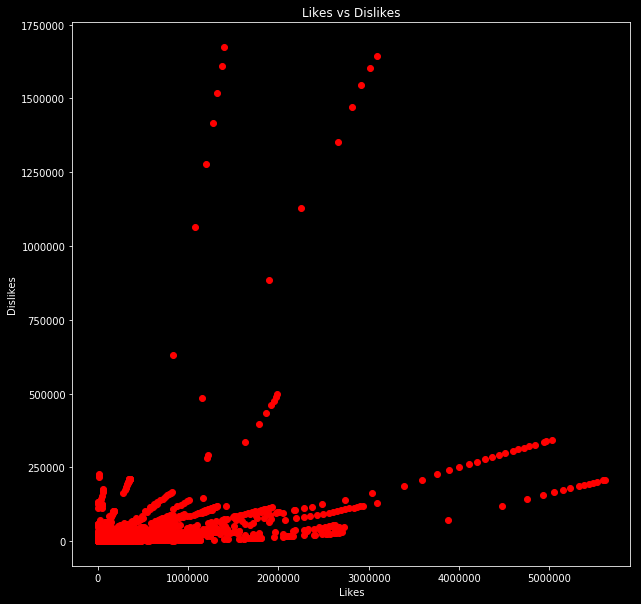

In [23]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['likes'], y = df['dislikes'], color = 'red' )
    plt.xlabel('Likes')
    plt.ylabel('Dislikes')
    plt.title('Likes vs Dislikes')
    plt.show()

In [24]:
# This plot represents the data set's repsentation of each video's corresponding likes and dislikes.
# Most of the data represented shows that videos with 0 - 3,000,000 likes will have between 0-250,000 dislikes.
# Any extreme values can be easily read outside of the main data area.

In [25]:
df['likes_log'] = np.log(df['likes'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [26]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,assignable,category,likes_log
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,People & Blogs,10.960010
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,Entertainment,11.484372
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,True,Comedy,11.891588
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,True,Entertainment,9.227394
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,Entertainment,11.792336


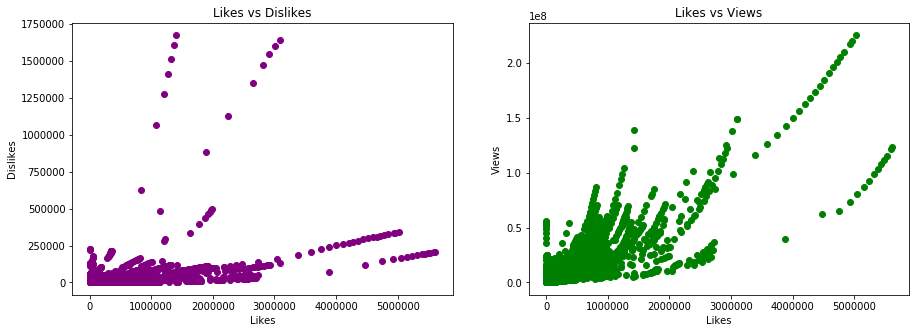

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = df['likes'], y = df['dislikes'], color='purple')
plt.title('Likes vs Dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')


plt.subplot(1, 2, 2)
plt.scatter(x = df['likes'], y = df['views'], color='green')
plt.title('Likes vs Views')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

In [28]:
# These subplots compare the "Likes vs Dislikes" plot we used earlier with a "Likes vs Views" plot.
# Since "Views" are represented as 0-2.5 1e8, we can conclude that there are far more views per amount of likes.

In [29]:
import seaborn as sns

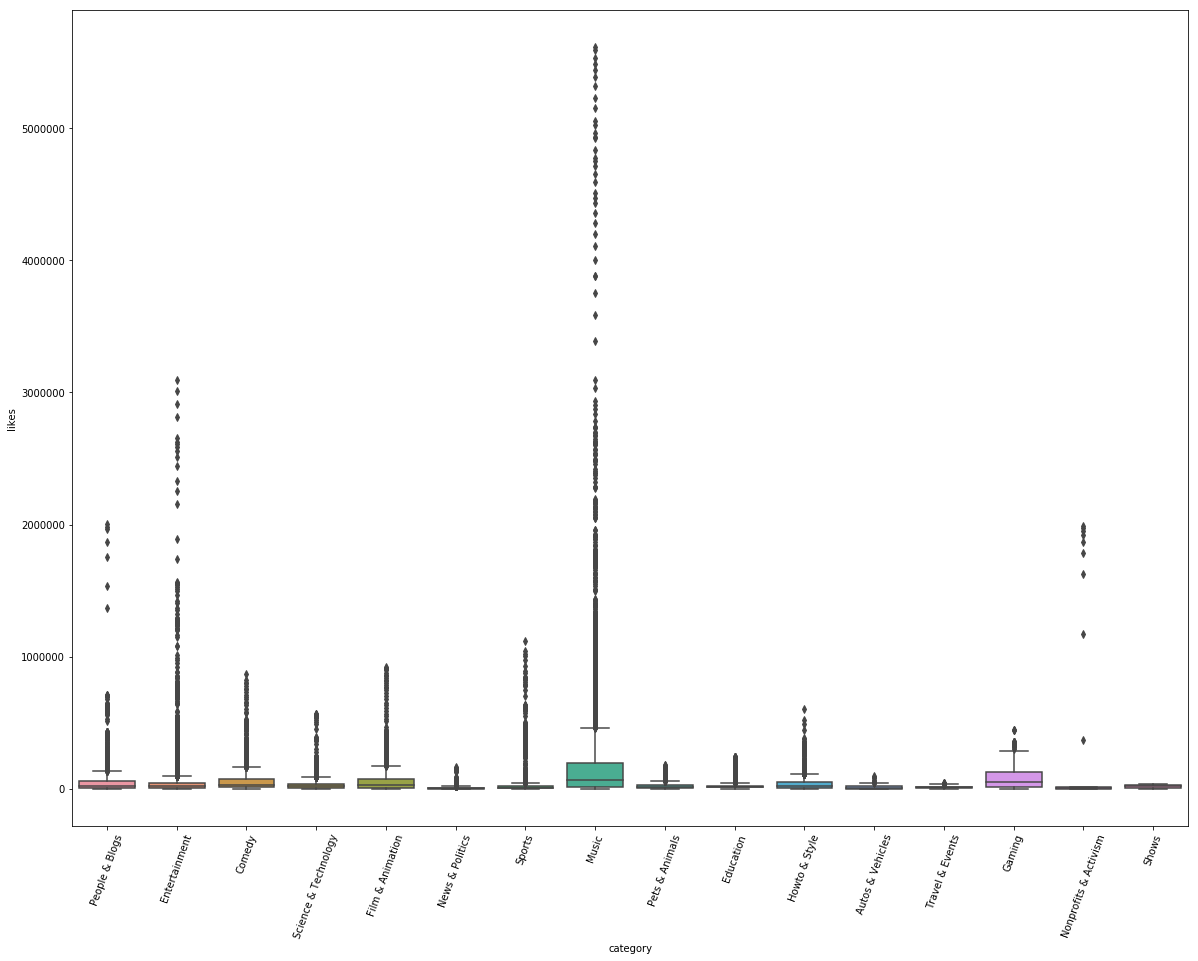

In [30]:
plt.figure(figsize=(20,15))
sns.boxplot(x="category", y="likes", data=df)
plt.xticks(rotation=70)
plt.show()

In [31]:
# This is a box plot representation corresponding categories with likes.  
# "Entertainment" & "Music" have a large amount of likes in their respective upper percentiles, with "Music"
# by far in the lead.  Due to these"outlier" values, the graph is a bit zoomed out and difficult to 
# read in its present form.

# Box Plot (Zoomed In)

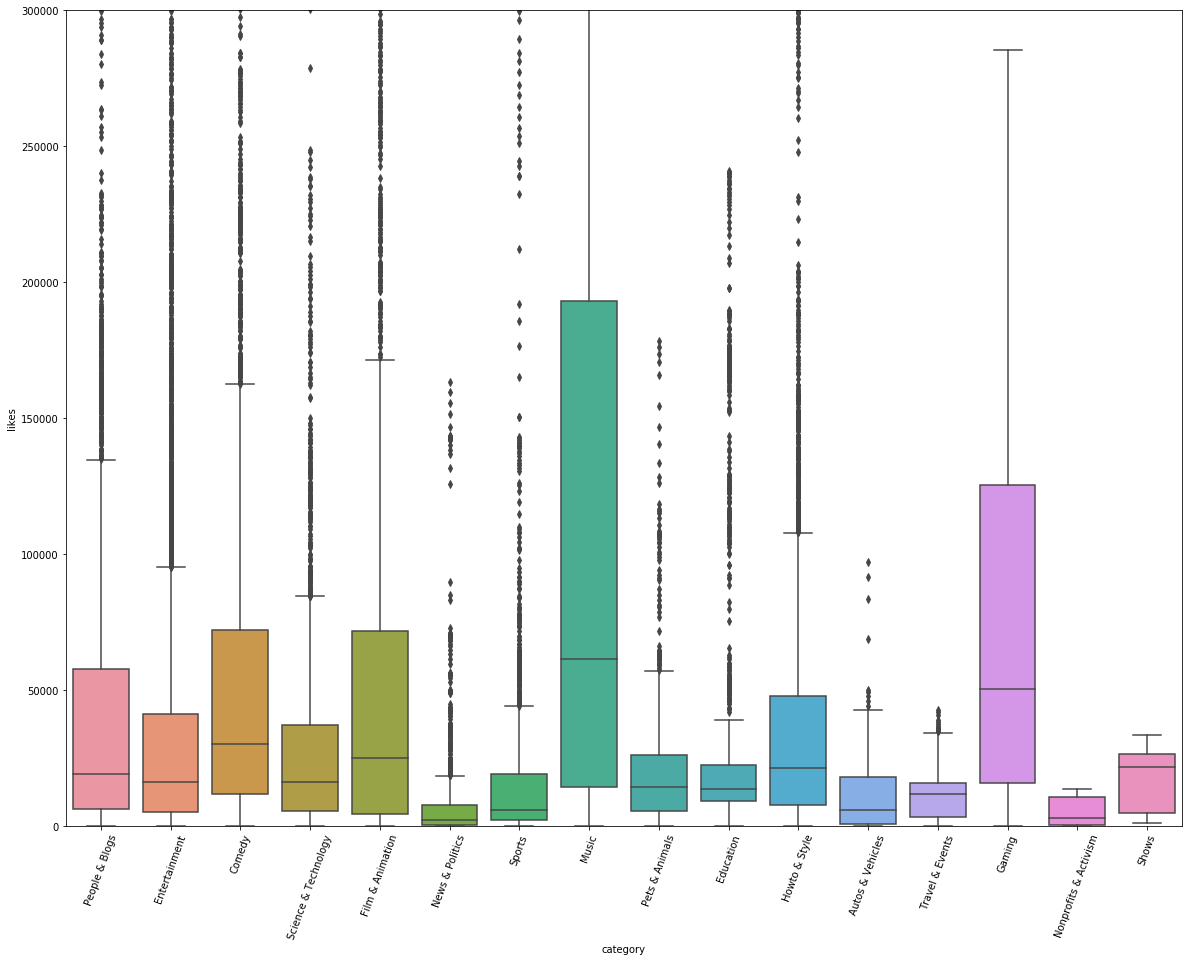

In [35]:
plt.figure(figsize=(20,15))
sns.boxplot(x="category", y="likes", data=df)
plt.ylim([0, 300000])
plt.xticks(rotation=70)
plt.show()